# Power Calculation

In this secion we take a look at experimental power of a planned experiment. Say we want to run an a/b test and we want to know if we improve things by 5% - will we be able to get a statistically significant result? We may waste a lot of energy and time in running a test that is unmeasureable!

Power calculations let us run some simulations (simulated a/b tests) to see the fraction of times we should expect to see a significantly significant result. 

For this example, we keep things simple and apply a 5% lift uniformly. It is important that you do a good job at thinking about the lift your experiment will have. Is your estimated lift realistic? Are all members of your population impacted in the same way?

See [this tutorial](https://signalvnoise.com/posts/3004-ab-testing-tech-note-determining-sample-size) for more information on why power analysis is important.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

In [3]:
def run_simulation(lift, test_size, ctrl_size):
    results = []
    # the more simulations you do the more confident you can be in 
    # the power calculation. 3k is a good heuristic.
    for i in range(3000):

        # in real life you would use real data and then apply some hypothetical lift to it
        # the variance in our test group is also higher
        test = np.random.normal(loc=100, scale=100, size=test_size) * lift
        ctrl = np.random.normal(loc=100, scale=100, size=ctrl_size) 

        results.append(bs.bootstrap_ab(test, ctrl, bs_stats.sum, bs_compare.percent_change))    
    return results

In [4]:
# If you arent suppressing warnings this will warn you about the size of your control and test population sizes
# These methods work when the sampled population is a good representation of the larger population. 

# We reccomend at least 3k samples in test and in control. This is a completely arbitrary number 
# but it should be good enough for many situaitons. 

test_results = run_simulation(lift=1.1, test_size=500, ctrl_size=500)

In [5]:
import bootstrapped.power as bs_power

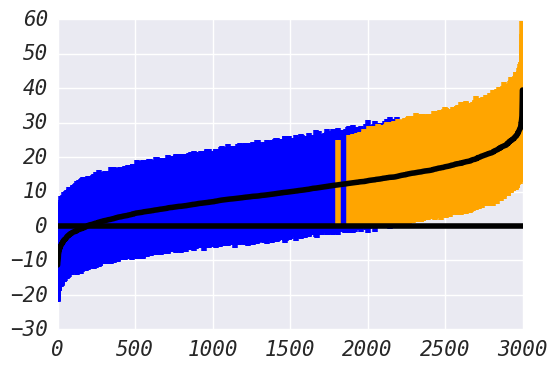

In [6]:
bs_power.plot_power(test_results)

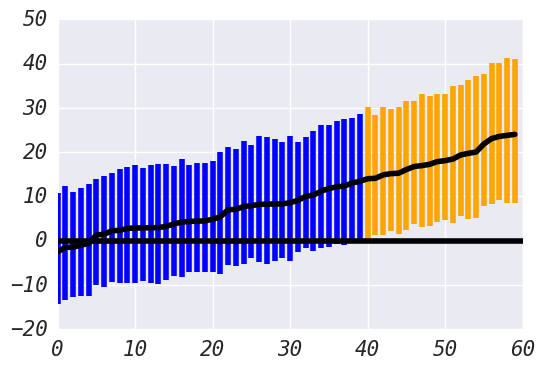

In [14]:
# take every 10th sample to make plotting a bit cleaner
bs_power.plot_power(test_results[::50])

In [ ]:
# This test was positive but we should only expect to see a significantly positive 
# result ~15% of the time
bs_power.power_stats(test_results)

,Percent
Insignificant,67.000
Negative,6.400
Negative Significant,0.000
Positive,93.600
Positive Significant,33.000


### Can we do something to improve our chances of measuring a good result?
Yes! Lets try again with larger proposed test and control groups.

In [ ]:
larger_test_results = run_simulation(lift=1.1, test_size=5000, ctrl_size=5000)

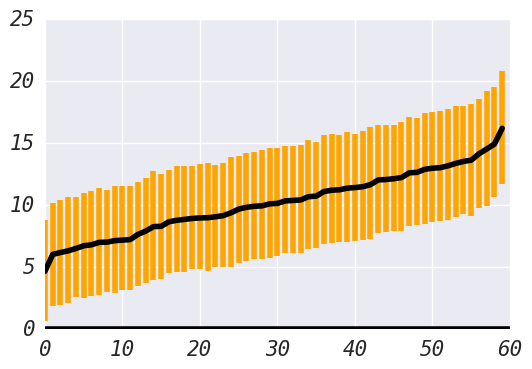

In [13]:
# take every 10th sample to make plotting a bit cleaner
bs_power.plot_power(larger_test_results[::50])

In [ ]:
bs_power.power_stats(larger_test_results)

,Percent
Insignificant,0.200
Negative,0.000
Negative Significant,0.000
Positive,100.000
Positive Significant,99.800
